Featurization Model Selection and Tuning course. 

     Following table describes the documents available in a corpus.

DocID  Text

D1     ‘John and Bob are brothers.’

D2     ‘John went to the store. The store was closed’.

D3     ‘Bob went to the store too.’



In [2]:
import pandas as pd

In [3]:
simple_train = ['John and Bob are brothers.', 'John went to the store. The store was closed', 'Bob went to the store too.']

In [4]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [5]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [7]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]], dtype=int64)

> **b)** What is term frequency? How many different ways can it be calculated? What are the implications of different ways of calculating?

In [8]:
# Term Frequency
# examine the vocabulary and document-term matrix together
tf = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
tf

,and,are,bob,brothers,closed,john,store,the,to,too,was,went
0,1,1,1,1,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,2,2,1,0,1,1
2,0,0,1,0,0,0,1,1,1,1,0,1


**Term frequency**
>Suppose we have a set of English text documents and wish to rank which document is most relevant to the query, "the brown cow". A simple way to start out is by eliminating documents that do not contain all three words "the", "brown", and "cow", but this still leaves many documents. To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency. The first form of term weighting is due to Hans Peter Luhn (1957) which may be summarized as:

>**The weight of a term that occurs in a document is simply proportional to the term frequency.**

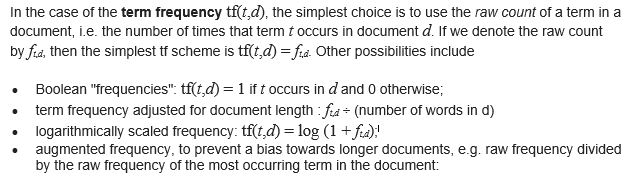

**Implications of different ways of calculating (Boolean Frequencies)**

#### Consider a collection (or corpus, or set) of four sentences (or documents, or strings) made up of words (or terms, or tokens):

**1** the cat and dog sat

**2** the dog and cat sat

**3** the cat sat and sat

**4** the cat killed the dog

One thing we can do is transform this corpus to a bag of words representation, which just means we’re keeping track of what words there are but not what order they’re in. We could use binary values to represent whether a word appears or not:






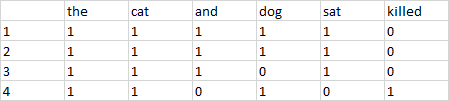


In this representation we've lost word order, but we've also lost term frequency: we can't tell that sentence three has twice as much sitting as sentence two. 

In [9]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 12), columns=vect.get_feature_names())

,and,are,bob,brothers,closed,john,store,the,to,too,was,went
0,1,1,2,1,1,2,2,2,2,1,1,2


In [10]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,and,are,bob,brothers,closed,john,store,the,to,too,was,went
0,1.0,1.0,0.5,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,0.5
2,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.5,1.0,0.0,0.5


## Using TF-IDF

> **a)** Create the term document matrix with TM-IDF as the entries

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# TfidfVectorizer
vect = TfidfVectorizer()
TFIDF = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
TFIDF

,and,are,bob,brothers,closed,john,store,the,to,too,was,went
0,0.490479,0.490479,0.373022,0.490479,0.000000,0.373022,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.345808,0.262996,0.525991,0.525991,0.262996,0.00000,0.345808,0.262996
2,0.000000,0.000000,0.385503,0.000000,0.000000,0.000000,0.385503,0.385503,0.385503,0.50689,0.000000,0.385503


>**c)** What is the implication of using ‘stopwords’ during the textmining? What is the positive impact? What are the possible negative impacts?



When working with text mining applications, we often hear of the term “stop words” or “stop word list” or even “stop list”. Stop words are just a set of commonly used words in any language. Stop words are commonly eliminated from many text processing applications because these words can be distracting, non-informative (or non-discriminative) and are additional memory overhead.

An example, is **sentiment classification.** 
If a classifier is trying to decide if the sentence “this is a lousy car” carries a positive or negative connotation, both the positive and negative classes would both carry words like “this”, “is” and “a” – which are all common English words. By chance, it could happen that one class just carries a lot more of the common English terms than the other class. This can potentially draw the classifier into selecting the class with a higher occurrence of the common English words. Thus, the stop words in this case can be distracting and can prevent a model from deciding on the correct class membership. Eliminating these common terms can do two things for the classifier: (1) learning can become much faster, since you are reducing the the total number of features in use and (2) prediction can become more accurate since you are eliminating “noise” or distracting features.


**Possible negative impacts of using published set of stop words**

While it is fairly easy to use a published set of stop words, in many cases, using such stop words is completely insufficient for certain applications. For example, in clinical texts, terms like “mcg” “dr.” and “patient” occur almost in every document that you come across. So, these terms may be regarded as potential stop words for clinical text mining and retrieval. Similarly, for tweets, terms like “#” “RT”, “@username” can be potentially regarded as stop words. The common language specific stop word list generally DOES NOT cover such domain specific terms.

> **d)** Recreate the term-document matrix in exercise (a) after using stopwords for the words (and, are, the, to).  What do you see now in the resulting tdm?

In [13]:
vect = TfidfVectorizer(stop_words={'and','are','the','to'})
TFIDF1 = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
TFIDF1

,bob,brothers,closed,john,store,too,was,went
0,0.517856,0.680919,0.000000,0.517856,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.427554,0.325166,0.650331,0.000000,0.427554,0.325166
2,0.459854,0.000000,0.000000,0.000000,0.459854,0.604652,0.000000,0.459854


tf increases if the number of words in the document decrease. idf is constant for a word. So tfidf for a word which is product of tf and idf also increases with increase in tf, thus observed in the above matrix.